<a href="https://colab.research.google.com/github/pratikkhandve55/CODSOFT/blob/main/Copy_of_Churn_user_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all nessesary liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # to ignore the unwanted warnings

In [ ]:
# load the dataset

data = pd.read_csv('Churn_Modelling.csv')
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# we have to drop the unnesesary entities from the dataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# drop unwanted columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical columns(values) which is gender
# we get_dummies
data = pd.get_dummies(data, drop_first=True) # one-hot encoding

# now, split the data into features and target
X = data.drop('Exited', axis = 1) # features
y = data['Exited']                # Target

# scale numerical features to handle big numbers in small range
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# now, split the data into training and testing part
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [ ]:
print(X_train)

[[ 0.36701255 -0.66001848  0.34135195 ... -0.57873591 -0.57380915
   0.91241915]
 [-0.19171334  0.29351742 -0.35020386 ...  1.72790383 -0.57380915
   0.91241915]
 [-0.94702796 -1.42284721 -0.69598177 ... -0.57873591  1.74273971
   0.91241915]
 ...
 [ 0.87400456 -0.08789694 -1.38753759 ... -0.57873591 -0.57380915
  -1.09598752]
 [ 0.17042381  0.38887101  1.03290776 ... -0.57873591 -0.57380915
   0.91241915]
 [ 0.48082708  1.15169974 -1.38753759 ...  1.72790383 -0.57380915
   0.91241915]]


In [ ]:
# now we trained the gradient boosting model to predict the churn

# import required libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# initialize the XGBoost model

model = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss') # eval_metric = log_loss  - suitable for it

# train the model on training data
model.fit(X_train, y_train)

# predict churn on test data
y_pred = model.predict(X_test)

# Evaluation metrics

print("Accuracy :", accuracy_score(y_test, y_pred))

print("\nconfusion Matrix", confusion_matrix(y_test, y_pred))  # TN, FP, FN, TP

print("\nClassification Report :\n", classification_report(y_test, y_pred))

Accuracy : 0.8695

confusion Matrix [[1521   86]
 [ 175  218]]

Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



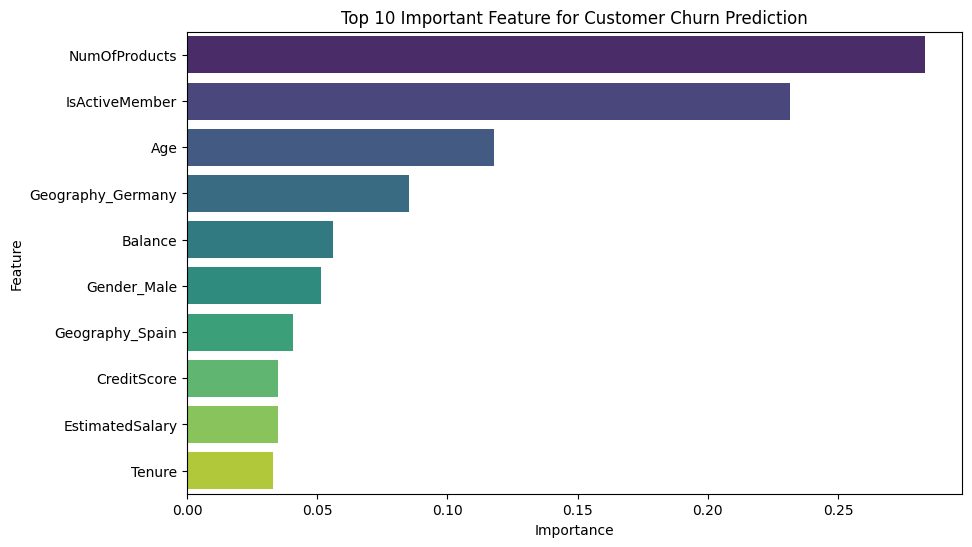

In [20]:
# for visualiation

# Extract feature importance
importances = model.feature_importances_

# match importance values to feature names
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance' : importances})

# sort values for better visualization
feature_imp_df = feature_imp_df.sort_values(by = 'Importance', ascending=False)

# plot top 10 important features
plt.figure(figsize = (10,6))
sns.barplot(x='Importance', y='Feature', data = feature_imp_df.head(10), palette='viridis')
plt.title("Top 10 Important Feature for Customer Churn Prediction")
plt.show()

In [27]:
# now lets , test the model with raw input

# Example customer data
sample_customer = np.array([[580,  # CreditScore
                             50,   # Age
                             3,    # Tenure
                             120000,# Balance
                             2,    # NumOfProducts
                             1,    # HasCrCard
                             0,    # IsActiveMember
                             70000, # EstimatedSalary
                             1,0, 0]]) # Geography/ Gender encoding

# make prediction
prediction = model.predict(sample_customer)
print("prediction :", "churn" if prediction[0] == 1 else "Not Churn")


prediction : Not Churn


In [ ]:
# base on the above features we can say that model will predicting tha result more accuratly due to the given numbers